In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

#1. 데이터
datasets = load_boston()
x = datasets.data
y = datasets.target
print(x.shape, y.shape)
print(datasets.feature_names)
# print(datasets.DESCR)

df = pd.DataFrame(x, columns=[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                               'TAX', 'PTRATIO', 'B', 'LSTAT']]) # 컬럼 이름 확인

df['target(y)'] = y
print(df) 

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

    PTR

========================= 상관계수 히트 맵 =============================
               CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM       1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN        -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS      0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS      -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX        0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM        -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE        0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS       -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD        0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX        0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO    0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
B         -0.385064  0.175520 -0.356977  0.048788 -0.38005

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


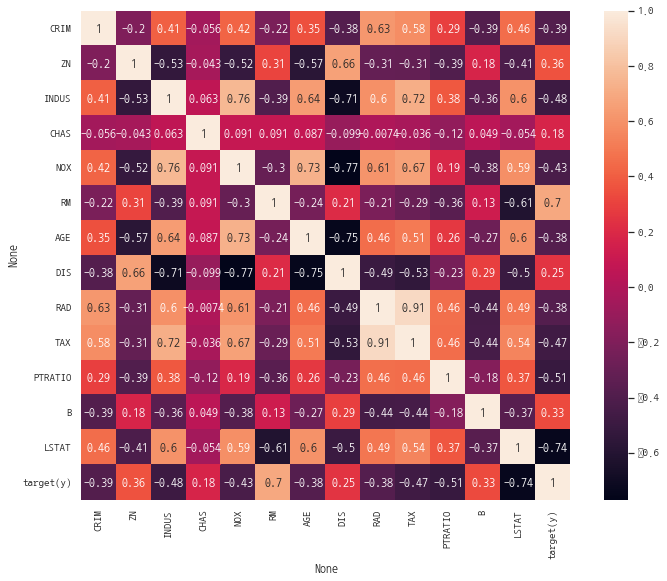

In [22]:
print('========================= 상관계수 히트 맵 =============================')
print(df.corr())    # 상관관계 확인

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set(font_scale = 1.2)
sns.set(rc={'figure.figsize':(12, 9)}) # 가로세로 사이즈 세팅
sns.heatmap(data=df.corr(), # 상관관계
            square=True,    # 정사각형으로 view
            annot=True,     # 각 cell의 값 표기 유무
            cbar=True       # colorbar의 유무
            )
plt.show()    

In [23]:
# ==========================  변수 정리 ============================== #
# RAD: 방사형 고속도로까지의 거리
# TAX: 재산세율

x= df.drop(['TAX', 'RAD'], axis=1)  # 인덱스 레벨을 지정해주어야 함
print(x.shape)  

(506, 12)


/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
